In [1]:
import gymnasium as gym
import numpy as np
from itertools import count
import matplotlib.pyplot as plt
import random
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
import torch.multiprocessing as mp
from tqdm import tqdm
import os
os.chdir('..')

In [36]:
import pickle
from scripts.iql import FCDuelingQ
res = {}
with open('testfiles/iql_spread.results', 'rb') as file:
    res = pickle.load(file)

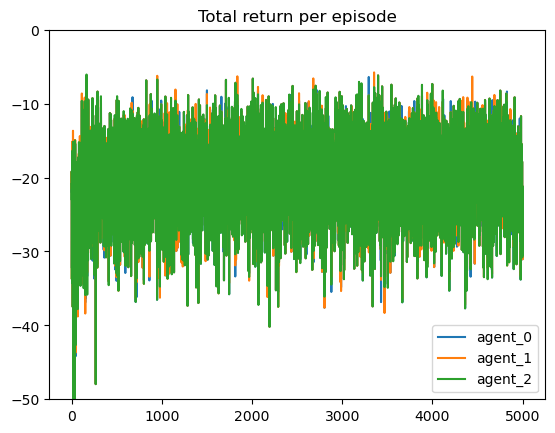

In [37]:
episode_returns = res['episode_returns']
for agent, returns in episode_returns.items():
    plt.plot(range(len(returns)), returns, label=f'{agent}')
plt.title('Total return per episode')
plt.ylim(bottom=-50, top=0)
plt.legend()

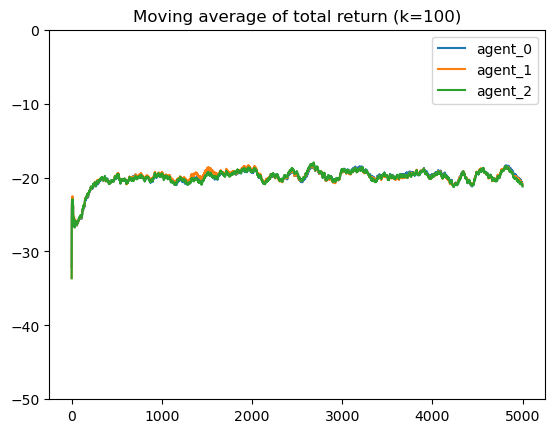

In [39]:
episode_returns = res['episode_returns']
for agent, returns in episode_returns.items():
    plt.plot(range(len(returns)), [np.mean(returns[max(0,x-100):x+1]) for x in range(len(returns))], label=f'{agent}')
plt.title('Moving average of total return (k=100)')
plt.ylim(bottom=-50, top=0)
plt.legend()

In [43]:
from pettingzoo.mpe import simple_spread_v3

env = simple_spread_v3.env(max_cycles=25, render_mode="human")
for _ in range(3):
    env.reset()

    for agent in env.agent_iter():
        observation, reward, termination, truncation, info = env.last()

        if termination or truncation:
            action = None
        else:
            # this is where you would insert your policy
            action = env.action_space(agent).sample()
            #action = res['best_model'][agent](observation).detach().max(1).indices.view(1, 1).item()

        env.step(action)
